In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
# Completely disable PyTorch warnings
import os
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"

In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
ion_df = pd.read_csv("./Dataset_Benchmarking/Datasets/ionosphere.csv", header = None)
num_features = ion_df.shape[1] - 1  # Assuming the last column is the label
feature_names = [f'feature{i+1}' for i in range(num_features)] + ['label']
ion_df.columns = feature_names
dict1 = {'g':0,'b':1}
ion_df = ion_df.replace({'label':dict1})
ion_df['label'] = ion_df['label'].apply(pd.to_numeric, errors = 'coerce')

/tmp/ipykernel_117792/1735106107.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ion_df = ion_df.replace({'label':dict1})


In [5]:
ion_df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [6]:
ion_df.drop("feature2", axis = 1, inplace = True)

In [7]:
train_df, test_df = train_test_split(ion_df, test_size = 0.2, random_state = 811)
X_train = train_df.drop("label", axis = 1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis = 1)
y_test = test_df["label"]

In [8]:
train_df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
67,0,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.0,...,-1.00000,1.00000,-1.00000,1.00000,0.65625,0.00000,0.00000,1.00000,-1.00000,1
252,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,0.0,...,0.00000,1.00000,0.22667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
124,1,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.47744,...,-1.00000,1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1
34,1,1.00000,-0.15899,0.72314,0.27686,0.83443,-0.58388,1.00000,-0.28207,1.0,...,0.14803,1.00000,-0.11582,1.00000,-0.11129,1.00000,0.53372,1.00000,-0.57758,0
86,1,0.67547,0.04528,0.76981,-0.10566,0.77358,0.03774,0.66038,-0.04528,0.64528,...,-0.15094,0.73886,-0.05801,0.66792,0.02264,0.86415,0.03774,0.73208,0.00755,0


In [9]:
# Clean the data before scaling
def clean_numeric_data(X):
    # Convert to DataFrame if not already
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X

    # Fix malformed numbers and convert to float
    for col in X.columns:
        X[col] = X[col].apply(lambda x: str(x).split('.')[0] + '.' + str(x).split('.')[1]
                             if isinstance(x, str) and x.count('.') > 1
                             else x).astype(float)
    return X

X_train = clean_numeric_data(X_train)
X_test = clean_numeric_data(X_test)

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Best Cross-validation Score: 0.8218870346598204

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.86      0.92        14

    accuracy                           0.97        71
   macro avg       0.98      0.93      0.95        71
weighted avg       0.97      0.97      0.97        71



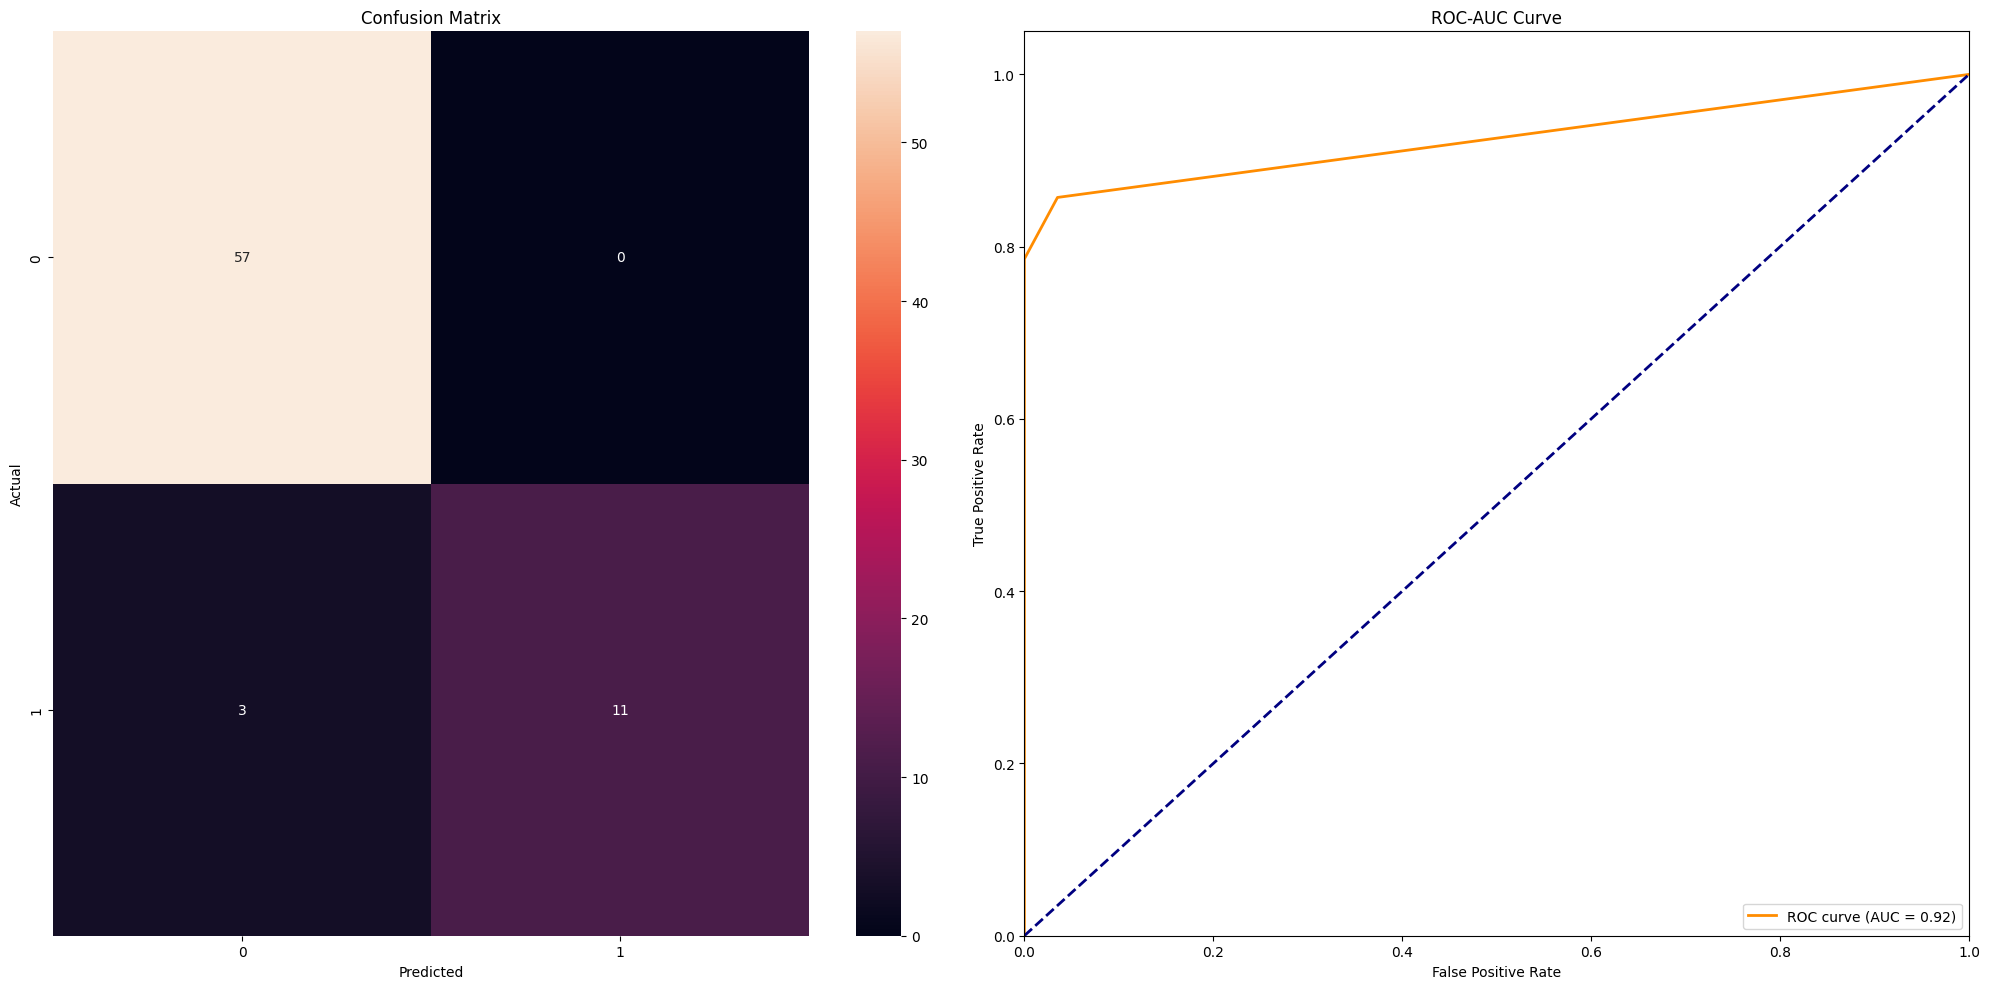

In [10]:
results_knn, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    scaler.fit_transform(X_test))))

In [11]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: feature9
Current performance: 0.98592
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature1
Current performance: 0.98592
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature6
Current per

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'validation_fraction': 0.1, 'tol': 0.001, 'penalty': 'l2', 'max_iter': 500, 'early_stopping': True, 'alpha': 0.001}

Best Cross-validation Score: 0.781587462082912

Feature Importances: {'feature1': 13.846261546580687, 'feature3': 5.094138342360299, 'feature4': 4.200512497983681, 'feature5': 6.941656611884292, 'feature6': 8.092849475222666, 'feature7': 4.124958250692435, 'feature8': 6.683325726782514, 'feature9': 4.498865437135133, 'feature10': 2.499904401578197, 'feature11': 2.064536871434901, 'feature12': 4.1199806233161205, 'feature13': 2.0391682618244076, 'feature14': 2.238335016965409, 'feature15': 3.220800023231482, 'feature16': 2.0656453181758496, 'feature17': 0.8431958327903041, 'feature18': 3.6115524837676136, 'feature19': 1.05655270414886, 'feature20': 1.2579925607385118, 'feature21': 3.165954994981051, 'feature22': 5.505863468420965, 'feature23': 2.283158268218053, 'feature24': 3.881816863396643, 'feature25': 5.209251469218016, 'feature26': 1.9508143116708

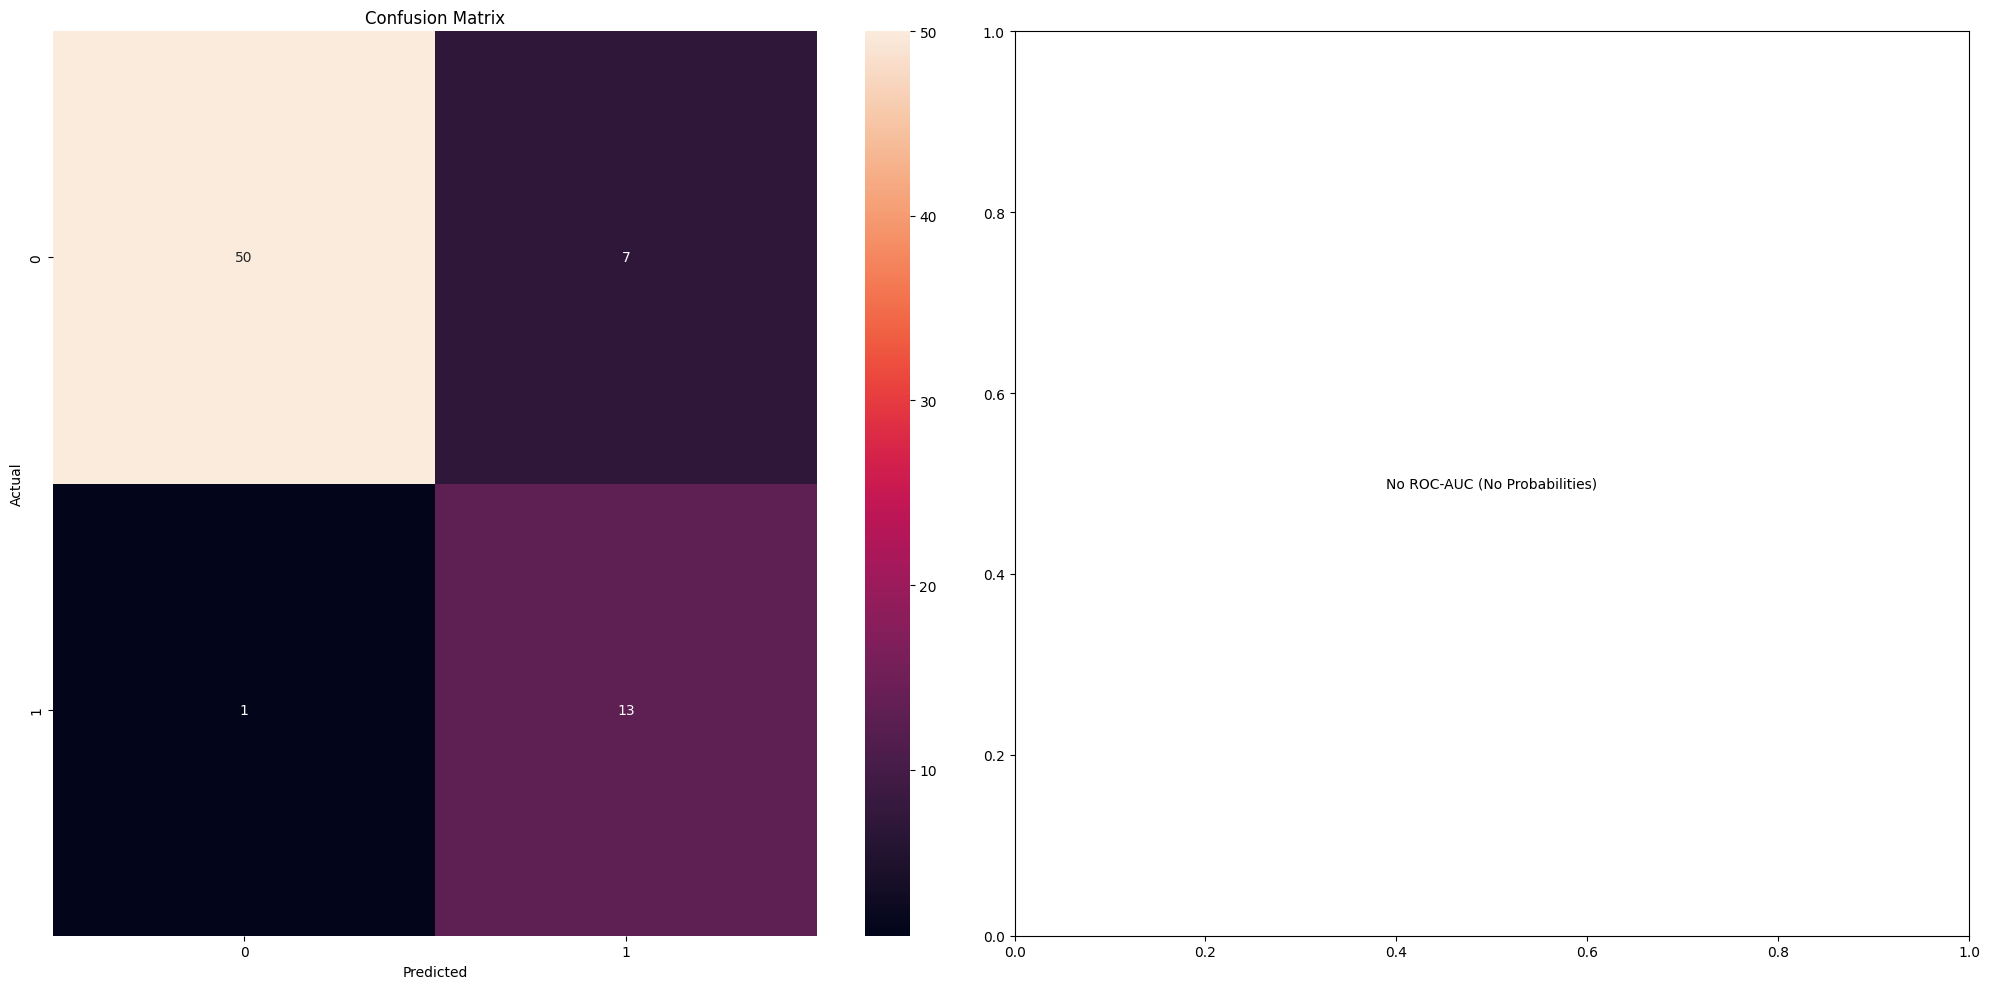

In [12]:
results_perceptron, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    scaler.fit_transform(X_test))))

In [13]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: feature21
Current performance: 0.85915
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature19
Current performance: 0.84507
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature20', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature4
Current perf

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Best Cross-validation Score: 0.916258934863586

Feature Importances: {'feature1': 0.025682012193586422, 'feature3': 0.09319287659099192, 'feature4': 0.04878572486197433, 'feature5': 0.1547497217292475, 'feature6': 0.04432971960134882, 'feature7': 0.07712383721389068, 'feature8': 0.029440366066943807, 'feature9': 0.014867960030045918, 'feature10': 0.012429674267418235, 'feature11': 0.014937802912263418, 'feature12': 0.02341605149140903, 'feature13': 0.016527777906572137, 'feature14': 0.024742248120970048, 'feature15': 0.006540678165915441, 'feature16': 0.02505568262961655, 'feature17': 0.009490037817142498, 'feature18': 0.02883583723246113, 'feature19': 0.013680389112496121, 'feature20': 0.013436538723384107, 'featur

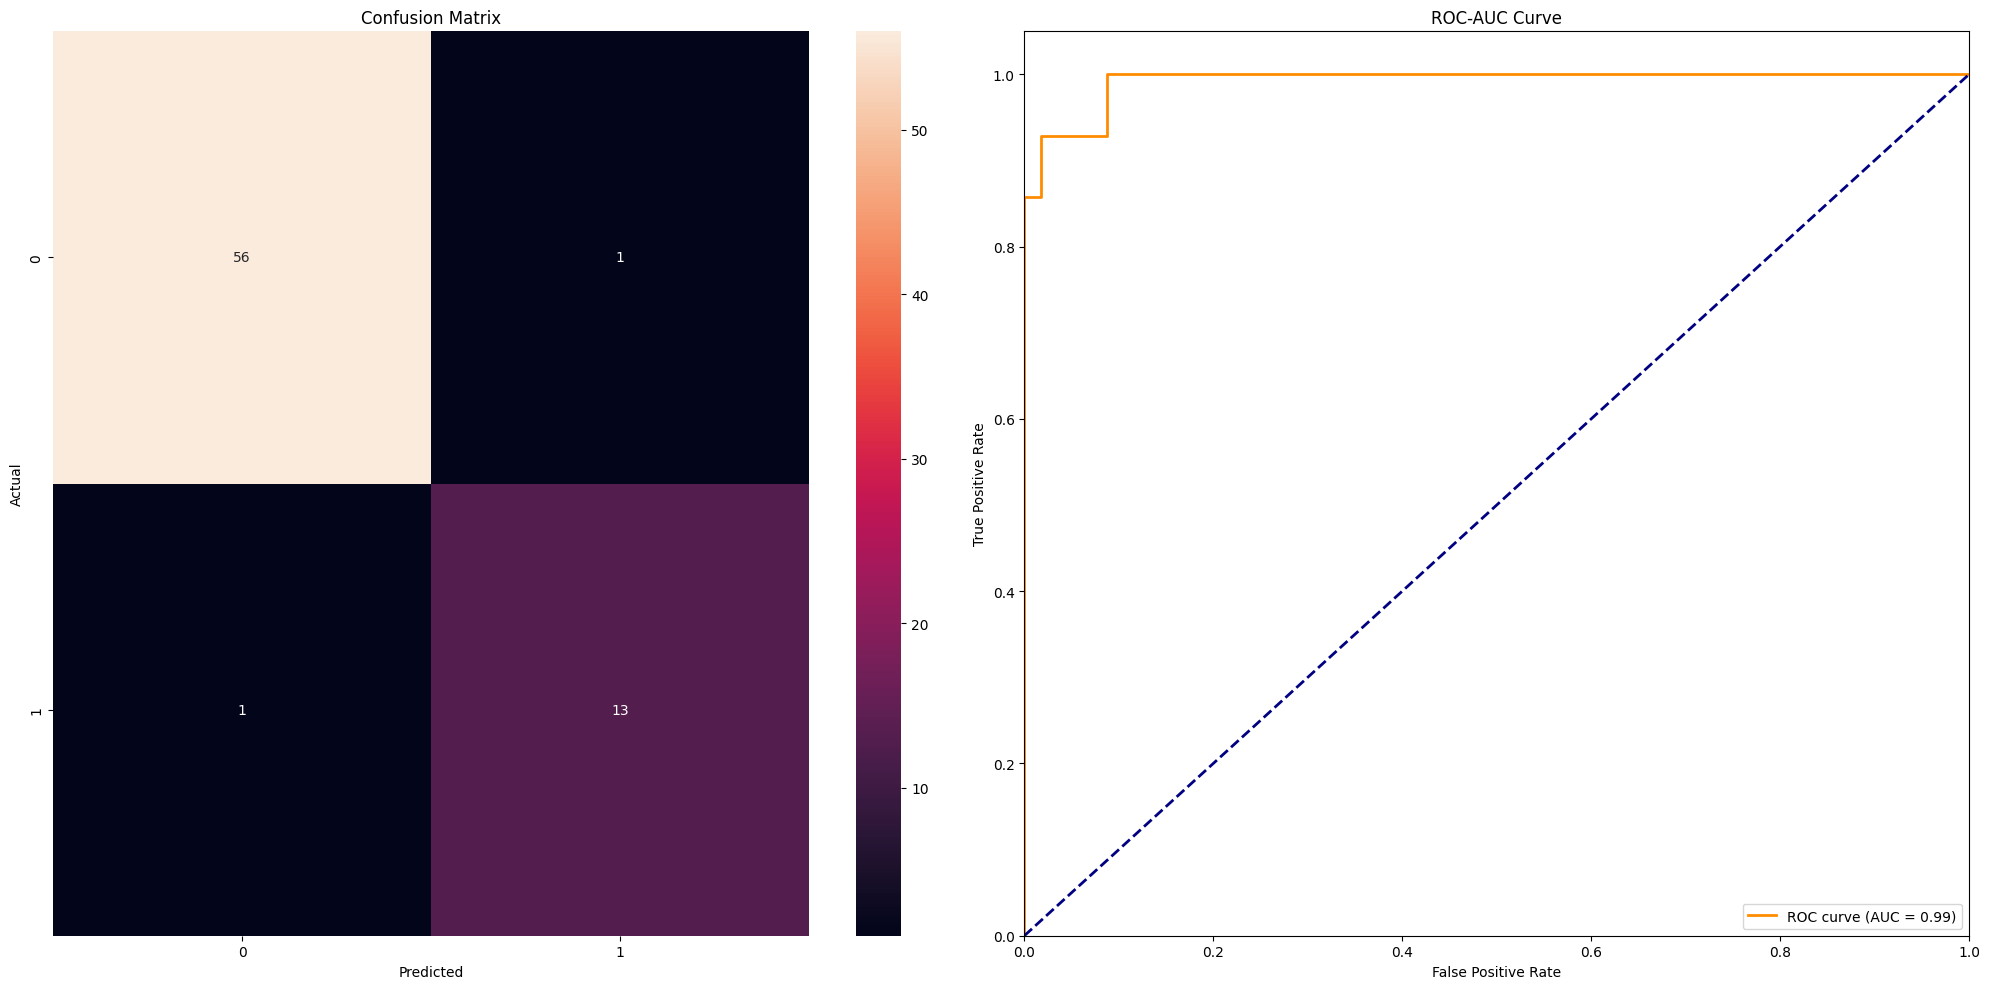

In [14]:
results_rf, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    scaler.fit_transform(X_test))))

In [15]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: feature4
Current performance: 0.94366
Remaining features: ['feature1', 'feature3', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature7
Current performance: 0.95775
Remaining features: ['feature1', 'feature3', 'feature5', 'feature6', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature3
Current per

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.05, 'max_features': None, 'max_depth': 40, 'criterion': 'log_loss', 'class_weight': None}

Best Cross-validation Score: 0.8698106132640552

Feature Importances: {'feature1': 0.0, 'feature3': 0.0812071310566557, 'feature4': 0.0, 'feature5': 0.5462805963052564, 'feature6': 0.0, 'feature7': 0.0, 'feature8': 0.0, 'feature9': 0.0, 'feature10': 0.0, 'feature11': 0.0, 'feature12': 0.0, 'feature13': 0.0, 'feature14': 0.0, 'feature15': 0.0, 'feature16': 0.0, 'feature17': 0.0, 'feature18': 0.0, 'feature19': 0.0, 'feature20': 0.0, 'feature21': 0.0, 'feature22': 0.0, 'feature23': 0.0, 'feature24': 0.0, 'feature25': 0.0, 'feature26': 0.0, 'feature27': 0.37251227263808784, 'feature28': 0.0, 'feature29': 0.0, 'feature30': 0.0, 'feature31': 0.0, 'feature32': 0.0, 'feature33': 0.0, 'feature34': 0.0}

Classification R

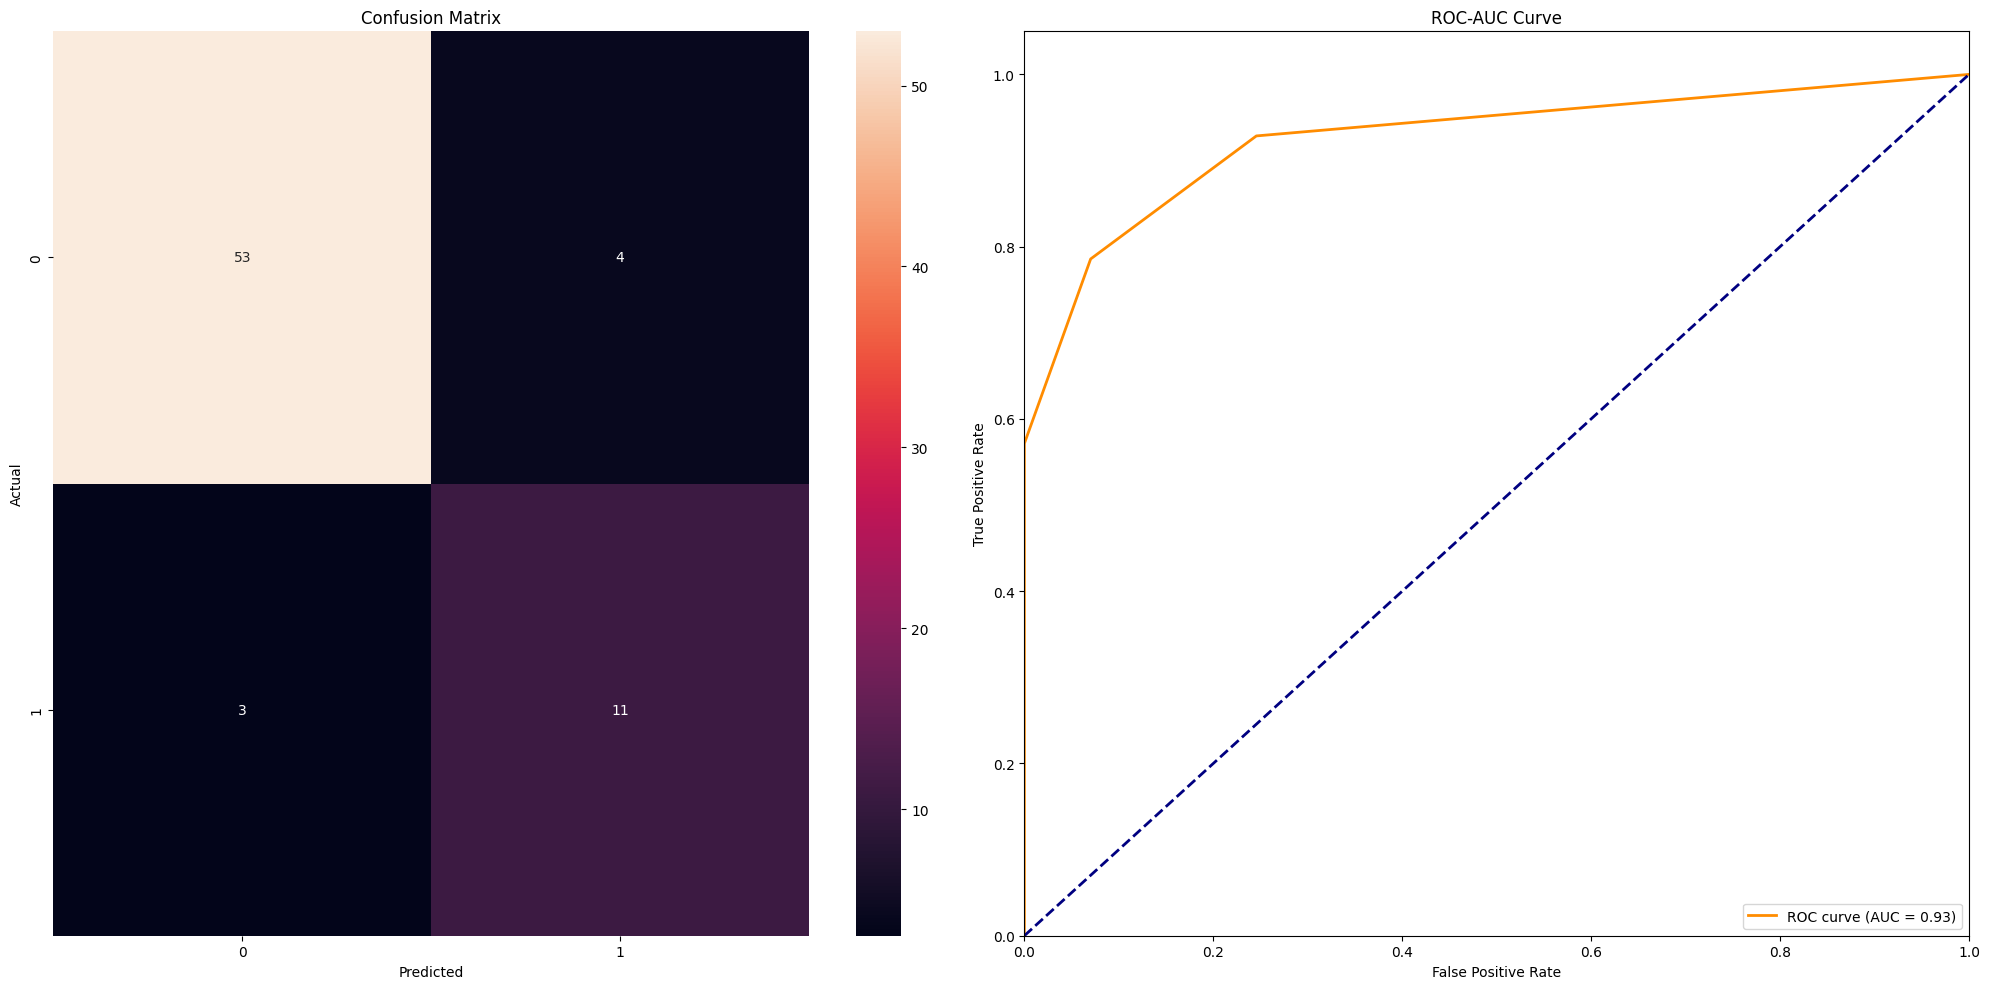

In [16]:
results_dt, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    scaler.fit_transform(X_test))))

In [17]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)


Removed feature: feature27
Current performance: 0.94366
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature11
Current performance: 0.94366
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature6
Current perf

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'coef0': 0.5, 'class_weight': None, 'C': 10}

Best Cross-validation Score: 0.9332946486137976

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        57
           1       0.61      1.00      0.76        14

    accuracy                           0.87        71
   macro avg       0.80      0.92      0.84        71
weighted avg       0.92      0.87      0.88        71



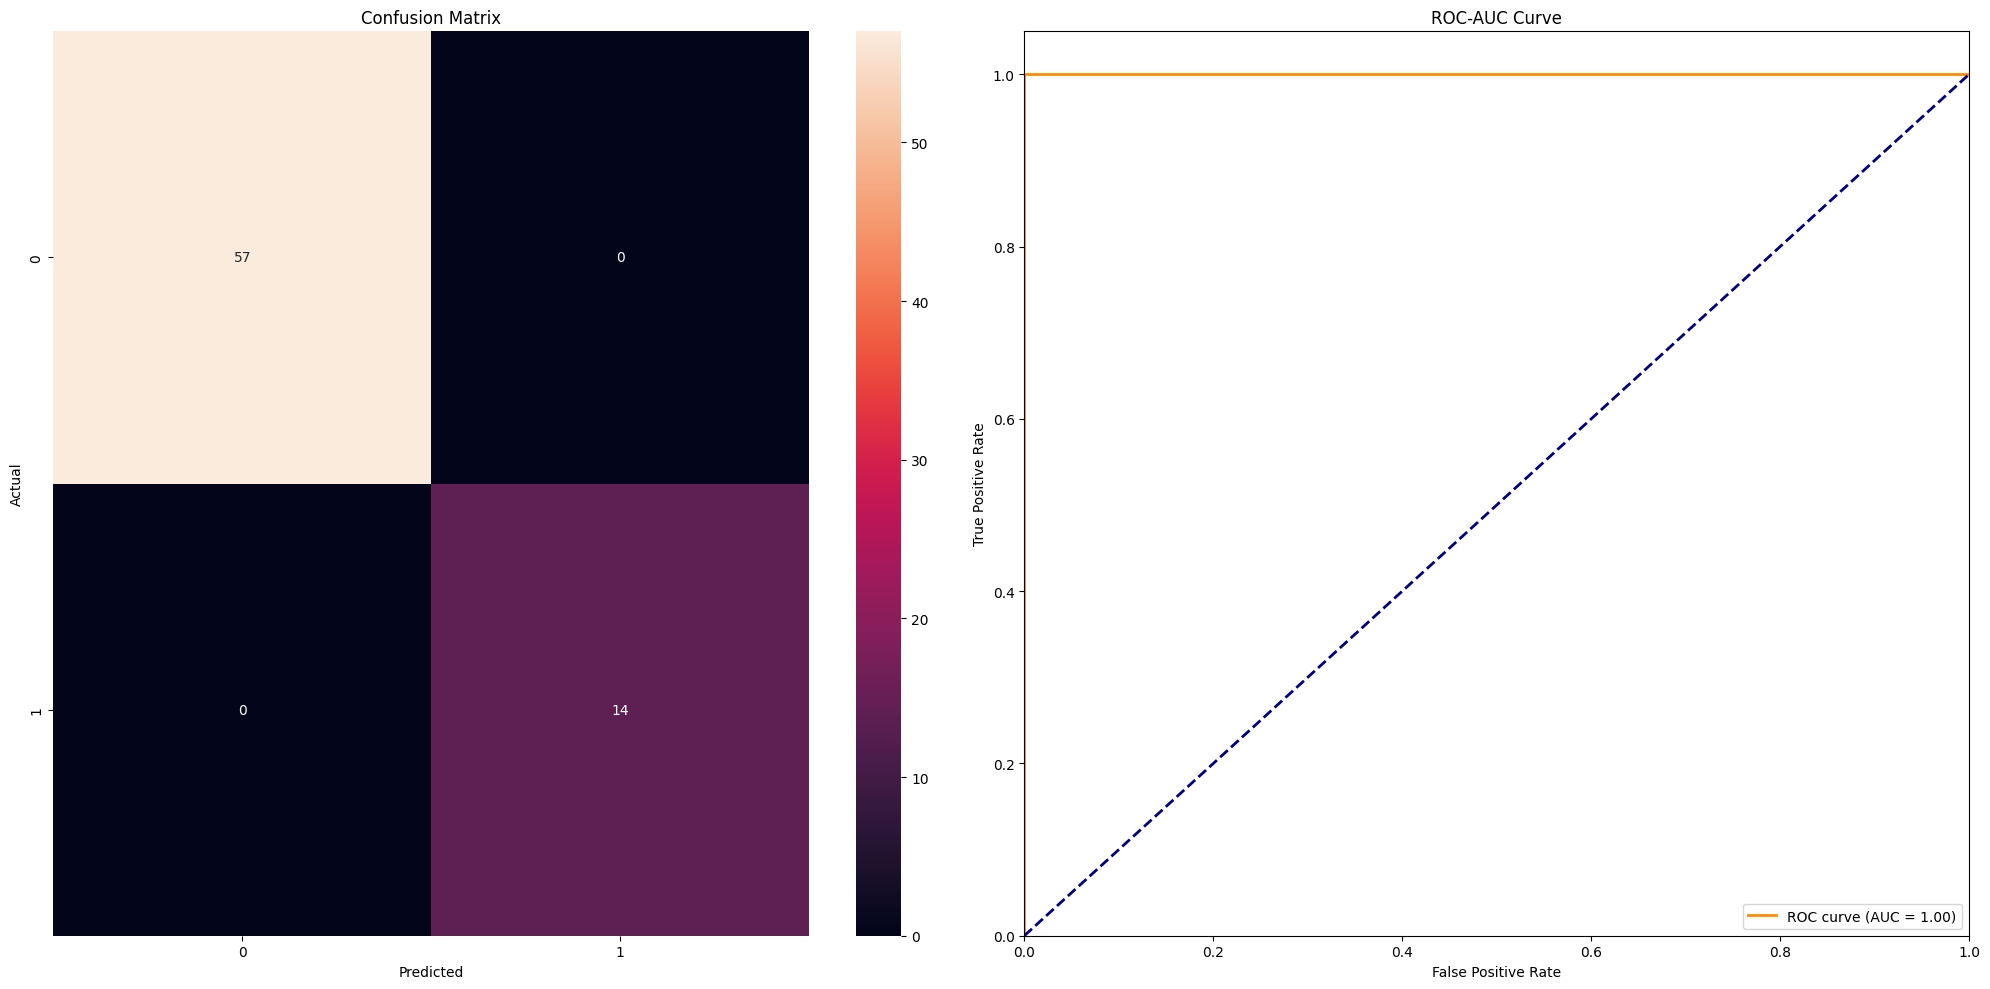

In [18]:
results_svm, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm')

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    scaler.fit_transform(X_test))))

In [19]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: feature10
Current performance: 0.90141
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature14
Current performance: 0.91549
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature11', 'feature12', 'feature13', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature12
Current per

In [20]:
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt


In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class OptimizedBSpline(nn.Module):
    """Optimized B-spline with iterative De Boor algorithm"""
    def __init__(self, knots, degree=3):
        super().__init__()
        self.knots = knots
        self.degree = degree
        self.n_knots = len(knots)

    def _find_interval(self, t):
        """Find the knot interval index for each t value"""
        # Clamp t to valid range and find interval using searchsorted
        t_clamped = torch.clamp(t, self.knots[self.degree], self.knots[self.n_knots - self.degree - 1])
        i = torch.searchsorted(self.knots, t_clamped, right=True) - 1
        # Ensure i stays within valid bounds for degree-k spline
        return torch.clamp(i, self.degree, self.n_knots - self.degree - 1)

    def forward(self, t, control_points):
        """Iterative De Boor algorithm for B-spline evaluation"""
        batch_size = t.shape[0]
        n_control = len(control_points)
        k = self.degree

        # Find knot interval for each t
        interval = self._find_interval(t)  # Shape: [batch_size]

        # Initialize temporary control points for each t
        d = torch.zeros(batch_size, k + 1, device=t.device, dtype=t.dtype)
        for j in range(k + 1):
            idx = torch.clamp(interval - k + j, 0, n_control - 1)
            d[:, j] = control_points[idx]

        # Iterative De Boor computation
        for r in range(1, k + 1):
            for j in range(k, r - 1, -1):
                left_knot = self.knots[interval - k + j]
                right_knot = self.knots[interval - k + j + r]
                alpha = (t - left_knot) / (right_knot - left_knot + 1e-8)  # Add epsilon for stability
                d[:, j] = (1 - alpha) * d[:, j - 1] + alpha * d[:, j]

        return d[:, k]  # Final value for each t

class OptimizedTorchCubicSpline(nn.Module):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = nn.Parameter(y)
        n = len(x)
        self.register_buffer('knots', torch.cat([x[0].repeat(3), x[1:-1], x[-1].repeat(3)]))
        self.bspline = OptimizedBSpline(self.knots, degree=3)
        self.x_min = x[0]
        self.x_max = x[-1]

    def forward(self, t):
        return self.bspline(torch.clamp(t, self.x_min, self.x_max), self.y)

class OptimizedDifferentiablePchip(nn.Module):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = nn.Parameter(y)
        self.n = len(x) - 1

    def _compute_derivatives(self, y):
        dy = y[1:] - y[:-1]
        dx = self.x[1:] - self.x[:-1]
        slopes = dy / dx
        d = torch.zeros_like(y)
        for i in range(1, len(y)-1):
            if slopes[i-1] * slopes[i] > 0:
                w1 = 2*dx[i] + dx[i-1]
                w2 = dx[i] + 2*dx[i-1]
                d[i] = (w1 + w2) / (w1/slopes[i-1] + w2/slopes[i])
        d[0] = slopes[0]
        d[-1] = slopes[-1]
        return d

    def forward(self, t):
        idx = torch.clamp(torch.searchsorted(self.x, t) - 1, 0, self.n - 1)
        x0 = self.x[idx]
        x1 = self.x[idx + 1]
        y0 = self.y[idx]
        y1 = self.y[idx + 1]
        t_norm = (t - x0) / (x1 - x0)
        d = self._compute_derivatives(self.y)
        d0 = d[idx]
        d1 = d[idx + 1]
        t2 = t_norm * t_norm
        t3 = t2 * t_norm
        h00 = 2*t3 - 3*t2 + 1
        h10 = t3 - 2*t2 + t_norm
        h01 = -2*t3 + 3*t2
        h11 = t3 - t2
        dx_segment = x1 - x0
        return h00 * y0 + h10 * dx_segment * d0 + h01 * y1 + h11 * dx_segment * d1

class OptimizedPyTorchGradientSMPA(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.05, epochs=100, random_state=7, verbose=False,
                 lambda_reg=0.0001, patience=10, decay_factor=0.9, min_learning_rate=1e-6,
                 n_control_points=6, smoothing_factor=0.0001, spline_type='cubic',
                 device=None, track_history=False, optimizer_type='adam', scheduler_type='reduce_on_plateau'):
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.verbose = verbose
        self.lambda_reg = lambda_reg
        self.patience = patience
        self.decay_factor = decay_factor
        self.min_learning_rate = min_learning_rate
        self.n_control_points = n_control_points
        self.smoothing_factor = smoothing_factor
        self.spline_type = spline_type
        self.device = device if device is not None else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.track_history = track_history
        self.optimizer_type = optimizer_type
        self.scheduler_type = scheduler_type

        if spline_type not in ['cubic', 'pchip']:
            raise ValueError("spline_type must be 'cubic' or 'pchip'")
        torch.manual_seed(random_state)
        np.random.seed(random_state)

    def _to_tensor(self, data, dtype=torch.float32):
        if isinstance(data, torch.Tensor):
            return data.to(self.device, dtype=dtype, non_blocking=True)
        return torch.tensor(data, dtype=dtype, device=self.device)

    def _calculate_class_means(self, X, y):
        mask_1 = y == 1
        self.m1 = torch.mean(X[mask_1], dim=0)
        self.m0 = torch.mean(X[~mask_1], dim=0)

    def _initialize_control_points(self, X):
        n_features = X.shape[1] - 1
        self.spline_models = nn.ModuleList()
        for i in range(n_features):
            x_min, x_max = X[:, i].min().item(), X[:, i].max().item()
            control_x = torch.linspace(x_min, x_max, self.n_control_points, device=self.device)
            y_min, y_max = X[:, -1].min().item(), X[:, -1].max().item()
            y_mid = (self.m0[-1] + self.m1[-1]) / 2
            y_range = y_max - y_min
            control_y = torch.empty(self.n_control_points, device=self.device).uniform_(
                y_mid - y_range * 0.05, y_mid + y_range * 0.05
            )
            if self.spline_type == 'cubic':
                spline = OptimizedTorchCubicSpline(control_x, control_y).to(self.device)
            else:
                spline = OptimizedDifferentiablePchip(control_x, control_y).to(self.device)
            self.spline_models.append(spline)
        self.initial_control_points = [(m.x.clone(), m.y.clone()) for m in self.spline_models]

    def _calculate_displacement(self, X):
        total_spline = sum(spline(X[:, i]) for i, spline in enumerate(self.spline_models))
        return X[:, -1] - total_spline

    def _update_pseudo_labels(self, X, y):
        m1_displacement = self._calculate_displacement(self.m1.unsqueeze(0))[0]
        self.class_1_pseudo = 1 if m1_displacement > 0 else -1
        self.class_0_pseudo = -self.class_1_pseudo
        return torch.where(y == 1, self.class_1_pseudo, self.class_0_pseudo)

    def _create_optimizer_and_scheduler(self):
        params = [p for spline in self.spline_models for p in spline.parameters()]
        if self.optimizer_type.lower() == 'adam':
            optimizer = torch.optim.Adam(params, lr=self.initial_learning_rate)
        else:
            optimizer = torch.optim.SGD(params, lr=self.initial_learning_rate)
        if self.scheduler_type.lower() == 'reduce_on_plateau':
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode='min', factor=self.decay_factor,
                patience=self.patience, min_lr=self.min_learning_rate)
        elif self.scheduler_type.lower() == 'step':
            scheduler = torch.optim.lr_scheduler.StepLR(
                optimizer, step_size=self.patience, gamma=self.decay_factor
            )
        else:
            scheduler = None
        return optimizer, scheduler

    def fit(self, X, y):
        if not set(np.unique(y)).issubset({0, 1}):
            raise ValueError("Labels must be 0 and 1")
        if X.shape[1] < 2:
            raise ValueError("At least 2 features required")

        X_tensor = self._to_tensor(X)
        y_tensor = self._to_tensor(y, dtype=torch.long)

        with torch.no_grad():
            self._calculate_class_means(X_tensor, y_tensor)
            self._initialize_control_points(X_tensor)

        optimizer, scheduler = self._create_optimizer_and_scheduler()

        best_error = float('inf')
        best_control_ys = [spline.y.clone() for spline in self.spline_models]
        best_class_1_pseudo = None

        if self.track_history:
            self.error_history_ = []
            self.control_point_history = [self.initial_control_points]

        for epoch in range(self.epochs):
            pseudo_labels = self._update_pseudo_labels(X_tensor, y_tensor)
            displacements = self._calculate_displacement(X_tensor)

            errors = displacements * pseudo_labels <= 0
            error_count = errors.sum().item()

            if self.verbose and epoch % 5 == 0:
                current_lr = optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch}: Errors = {error_count}, LR = {current_lr:.6f}")

            if error_count < best_error:
                best_error = error_count
                best_control_ys = [spline.y.clone() for spline in self.spline_models]
                best_class_1_pseudo = self.class_1_pseudo
                self.best_epoch = epoch
                if error_count == 0 and epoch > 10:
                    if self.verbose:
                        print(f"Perfect separation achieved at epoch {epoch}")
                    break

            if self.track_history:
                self.error_history_.append(error_count)
                self.control_point_history.append(
                    [(s.x.clone().cpu().numpy(), s.y.clone().detach().cpu().numpy())
                     for s in self.spline_models]
                )

            if error_count == 0:
                continue

            error_indices = torch.where(errors)[0]
            X_err = X_tensor[error_indices]
            y_err = y_tensor[error_indices]
            ti = torch.where(y_err == 1, 1, -1)

            spline_values = sum(spline(X_err[:, i]) for i, spline in enumerate(self.spline_models))
            loss = torch.mean(torch.relu(1.0 - ti * self.class_1_pseudo * (X_err[:, -1] - spline_values)))

            if self.lambda_reg > 0:
                smoothness_penalty = 0
                for spline in self.spline_models:
                    y_diff = spline.y[1:] - spline.y[:-1]
                    x_diff = spline.x[1:] - spline.x[:-1]
                    smoothness_penalty += torch.mean((y_diff / (x_diff + 1e-8))**2)
                loss += self.lambda_reg * smoothness_penalty

            optimizer.zero_grad(set_to_none=True)
            loss.backward()
            optimizer.step()

            if scheduler is None:
                if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    scheduler.step(error_count)
                else:
                    scheduler.step()
                if optimizer.param_groups[0]['lr'] <= self.min_learning_rate:
                    if self.verbose:
                        print(f"Minimum learning rate reached at epoch {epoch}")
                    break

        for spline, best_y in zip(self.spline_models, best_control_ys):
            spline.y.data = best_y
        self.class_1_pseudo = best_class_1_pseudo
        return self

    def predict(self, X):
        X_tensor = self._to_tensor(X)
        displacements = self._calculate_displacement(X_tensor)
        predictions = torch.where(displacements > 0,
                                torch.tensor(1 if self.class_1_pseudo > 0 else 0, device=self.device),
                                torch.tensor(0 if self.class_1_pseudo > 0 else 1, device=self.device))
        return predictions.cpu().numpy()

    def predict_proba(self, X):
        X_tensor = self._to_tensor(X)
        displacements = self._calculate_displacement(X_tensor)
        raw_probs = 1 / (1 + torch.exp(-displacements * self.class_1_pseudo * 0.5))
        if self.class_1_pseudo > 0:
            probs = torch.column_stack([1 - raw_probs, raw_probs])
        else:
            probs = torch.column_stack([raw_probs, 1 - raw_probs])
        return probs.cpu().numpy()

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
def reorder_least_correlated_feature(X, standardize=True, feature_order=None):
    """
    Reorder X based on correlation or a provided feature order.

    Parameters:
    - X: numpy array or pandas DataFrame
    - standardize: bool
    - feature_order: list, optional order from training set (default: None, compute from X)

    Returns:
    - X_reordered, feature_order (if computed)
    """
    is_dataframe = isinstance(X, pd.DataFrame)
    if is_dataframe:
        column_names = X.columns
        X_np = X.to_numpy()
    else:
        X_np = np.asarray(X)

    if feature_order is None:
        if standardize:
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_np)
        else:
            X_scaled = X_np.copy()

        corr_matrix = np.abs(np.corrcoef(X_scaled, rowvar=False))
        n_features = X_np.shape[1]
        avg_corr = (np.sum(corr_matrix, axis=1) - np.diag(corr_matrix)) / (n_features - 1)
        target_idx = np.argmin(avg_corr)
        feature_order = list(range(n_features))
        feature_order.pop(target_idx)
        feature_order.append(target_idx)

    if is_dataframe:
        X_reordered = X.iloc[:, feature_order]
    else:
        X_reordered = X_np[:, feature_order]

    return X_reordered, feature_order

# Usage
X_train_reordered, feature_order = reorder_least_correlated_feature(X_train)
X_test_reordered, _ = reorder_least_correlated_feature(X_test, feature_order=feature_order)

In [25]:
X_train_reordered = X_train_reordered.to_numpy()
X_test_reordered = X_test_reordered.to_numpy()

In [27]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [29]:
model = OptimizedPyTorchGradientSMPA(
    learning_rate=0.01,
    epochs=200,
    n_control_points=8,
    spline_type='pchip',
    device='cpu',  # Will use GPU if available
    track_history=True,
    random_state = 44,
    decay_factor=0.99
)

# Train model
model.fit(X_train_reordered, y_train)

OptimizedPyTorchGradientSMPA(decay_factor=0.99, device='cpu', epochs=200,
                             learning_rate=0.01, n_control_points=8,
                             random_state=44, spline_type='pchip',
                             track_history=True)

In [33]:
from sklearn.metrics import f1_score

score = model.score(X_test_reordered, y_test)
print(score)
f1 = f1_score(y_test, model.predict(X_test_reordered))
print(f1)
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test_reordered)))
cr = classification_report(y_test, model.predict(X_test_reordered))

0.9014084507042254
0.7407407407407407
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.77      0.71      0.74        14

    accuracy                           0.90        71
   macro avg       0.85      0.83      0.84        71
weighted avg       0.90      0.90      0.90        71



In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [35]:
param_grid = {
                'learning_rate': [0.01, 0.001, 0.02],           # Range to balance step size
                'epochs': [300],                         # Enough iterations to converge
                'n_control_points': [5, 8, 9, 15, 20],              # More points to capture wiggles
                'spline_type': ['cubic','pchip'],            # Test both spline types
                'patience': [15],                             # Fixed patience for consistency
                'decay_factor': [0.99],                        # Fixed decay for simplicity
                'min_learning_rate': [1.e-6],
                'smoothing_factor': [0.00000001, 0.000001]

}
smpa = OptimizedPyTorchGradientSMPA(random_state=12, track_history=True, device='cpu')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
grid_search = GridSearchCV(smpa, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=3)
grid_search.fit(X_train_reordered, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 5/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=pchip;, score=0.857 total time=  11.9s
[CV 2/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=pchip;, score=0.780 total time=  17.2s
[CV 1/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=pchip;, score=0.857 total time=  21.0s
[CV 4/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=pchip;, score=0.857 total time=  17.6s
[CV 3/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spli

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=OptimizedPyTorchGradientSMPA(device='cpu',
                                                    random_state=12,
                                                    track_history=True),
             n_jobs=-1,
             param_grid={'decay_factor': [0.99], 'epochs': [300],
                         'learning_rate': [0.01, 0.001, 0.02],
                         'min_learning_rate': [1e-06],
                         'n_control_points': [5, 8, 9, 15, 20],
                         'patience': [15], 'smoothing_factor': [1e-08, 1e-06],
                         'spline_type': ['cubic', 'pchip']},
             scoring='f1', verbose=3)

In [36]:
cr = classification_report(y_test, grid_search.best_estimator_.predict(X_test_reordered))
print("Classification report \n", cr)
print("Best CV score: ", grid_search.best_score_)

Classification report 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.73      0.79      0.76        14

    accuracy                           0.90        71
   macro avg       0.84      0.86      0.85        71
weighted avg       0.90      0.90      0.90        71

Best CV score:  0.8796536368134588


In [37]:
grid_search.best_params_

{'decay_factor': 0.99,
 'epochs': 300,
 'learning_rate': 0.001,
 'min_learning_rate': 1e-06,
 'n_control_points': 5,
 'patience': 15,
 'smoothing_factor': 1e-06,
 'spline_type': 'pchip'}